<em> Linear Regression Tutorial<br/>
Machine Learning Society  
<br />
Created by Saketh Nimmagadda on 3/27/19.<br/>
Copyright © 2019 Saketh Nimmagadda. All rights reserved.</em>
<br />
<br />

Today we'll be working through implementing linear regression to predict the estimated profit of opening a food truck in a new city. <br />
<br />
The basic idea behind linear regression is given some past training data, (example features and their corresponding output values), we try to compute a function that provides a good estimate of a new example's output. In the example of the food truck business, this is trying to find a function that gives an estimate of a food truck's profit in a new city that we haven't seen.<br />
<br />
Below is some code that we will use to visualize our training set

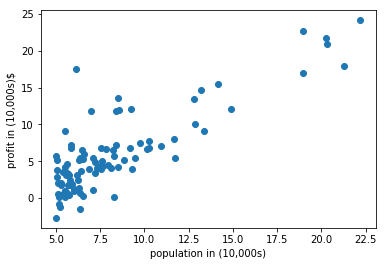

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

training_data = pd.read_csv('ex1data1.txt')
# Note X is our features we use to predict 
# y is the output we want to predict

# The following is a plot to help us better visualize our training set
plt.scatter(training_data['X'], training_data['y'])
plt.xlabel('population in (10,000s)')
plt.ylabel('profit in (10,000s)$')
plt.show()

Now let's try to use linear regression to fit a line to this data. <br />
How might we go about this? <br />
<br />
One strategy is to use something called least squares regression, basically you want to find the line, where the average of all the squared differences in height predicted by the line given an examples X value, and the heights actual value is minimized. <br />
<br />
In more mathematical terms: min(avg((X_predicted - y)^2))
<br />
<br />
How do we actually find this line?
<br />
<br />
Since we're finding a minimum, this seems like we're just optimizing a function. The function in this case is called the cost function and you can think of the cost function as the average squared error, (error = predicted - actual). While there are many optimization techniques we can use, the one that we are going to use is known as gradient descent. <br />
<br />
In this example our cost function will be two dimensional, but depending on the size of the feature vector (the features we use to predict in our model) our cost function will vary. For example in the equation: mx + b = y, m and b are the features, because they are what we want to tweak in order to get the best fitted line. <br /><em> Side Note: Our cost function will always be of dimensionality n+1, where n is the dimensionality of our feature vector, since the axes of our cost function will be one axis for feature plus one for the cost (error). </em> <br />
The advantage of gradient descent is that it works for these high dimensionality cost functions. But for easier visualization let's take the example of a cost-function in 3d, meaning two feature axes and a cost axis. <br />

The cost function for linear regression is convex, meaning it is bowl shaped, which means that it only has one global minimum. This is good because the way gradient descent works is that you start at some point on the cost function's surface, calculate the gradient (<em> basically a vector of all the partial derivatives along each axis, think of it as a slope for functions in dimensions higher than 2d </em>) at that point, and then subtract that gradient, multiplied by a constant factor (known as the learning rate) from the point you are at. This process is iterated many times until you reach the bottom of the bowl, you know when you reach this point, because you stop descending, as at the minimum of a function the gradient is zero. <br />

The idea with the learning rate is the higher it is, the faster you descend, however if the learning rate is too large, you can overshoot the minimum and reach a point higher on the surface then you started, then when you take another step you get even higher and higher forever. <br />

Here is a good visualization of how gradient descent works: 



In [2]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/kJgx2RcJKZY?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

Now let's work through an example of implementing gradient descent to find the line of best fit for the data above.

In [3]:
# The first thing we need to do is to define a cost function to run gradient descent upon. 
# The simplest cost function is the average squared error
# For our model we'll be using a line of the form y_hat = mx + b, where y_hat is our predicted value
# and x is the x value of each dot
# Our features which we'll be adjusting are m and b, essentially m and b will be axes of the cost function plot

# Doing zero initialization for simplicity's sake
m = 0
b = 0

Run this cell a couple times to observe the steps of gradient descent in action

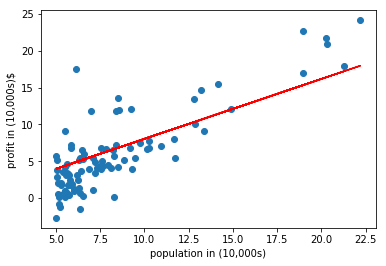

In [18]:
# Calculate the respective partial derivatives on the cost function (Avg. squared error)

# Calculate the partial derivative in the direction of m
dm = 0
for i in np.arange(len(training_data['X'])):
    xi = training_data['X'][i]
    yi = training_data['y'][i]
    dm += 2 * ((m * (xi) + b) - yi) * xi

dm = dm / len(training_data['X']);

# Calculate the partial derivative in the direction of b
db = 0
for i in np.arange(len(training_data['X'])):
    xi = training_data['X'][i]
    yi = training_data['y'][i]
    db += 2 * ((m * (xi) + b) - yi)
    
db = db / len(training_data['X']);

# For simplicity's sake we are going to set the learning rate (a) to 0.1
# The learning rate is what's known as a hyperparameter, and it's one of the things people tweak for better models
a = 0.01

# Update the "weights" of our model
m = m - a * dm
b = b - a * db

# plot updated model
plt.scatter(training_data['X'], training_data['y'])
plt.xlabel('population in (10,000s)')
plt.ylabel('profit in (10,000s)$')
x = training_data['X']
plt.plot(x, m*x + b, '-r', label='y=mx+b')
plt.show()

Concluding notes: The line of best fit can be very useful for making predictions, and this idea generalizes to any kind of data that lies on a hyperplane. However, for data that is non-linear, i.e doesn't lie on a hyperplane, linear regression is obviously not the best strategy. In addition when the training data is not representative of the overall distribution of the data we want to predict on, the model we come up with won't be very useful for predictions either.